# Setup

In [33]:
import os
import re
import json
import glob

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd

from astropy.constants import R_earth
import tensorflow as tf

from geexhp import datagen, datamod, datavis
from geexhp import stages as st_
from geexhp import datavis as dvis
dvis.configure_matplotlib()

In [2]:
# Load the dictionary containing the normalization statistics
with open('../data/normalization_stats.json', 'r') as f:
    stats = json.load(f)

# Load the best model
model_load = tf.keras.models.load_model("NN_22-tuner.keras")

In [3]:
# Denormalization functions for physical and chemical outputs
def denormalize_physical(predictions, stats, targets):
    original = np.zeros_like(predictions)
    for i, target in enumerate(targets):
        # Get stats: min, max, and best_n
        min_val = stats['outputs'][target]['min']
        max_val = stats['outputs'][target]['max']
        best_n = stats['outputs'][target]['best_n']
        # Inverse transformation:
        # prediction = ((val - min) / (max - min))^(1/best_n)
        # Thus, val = min + (max - min) * (prediction)^(best_n)
        original[:, i] = min_val + (max_val - min_val) * (predictions[:, i] ** best_n)
    return original

def denormalize_chemical(predictions, stats, targets):
    original = np.zeros_like(predictions)
    for i, target in enumerate(targets):
        best_n = stats['outputs'][target]['best_n']
        # Inverse transformation: prediction = val^(1/best_n) so val = prediction^(best_n)
        original[:, i] = predictions[:, i] ** best_n
    return original

In [4]:
# Target lists
physical_targets = [
    "OBJECT-RADIUS-REL-EARTH",
    "OBJECT-GRAVITY",
    "ATMOSPHERE-TEMPERATURE",
    "ATMOSPHERE-PRESSURE"
]
main_chemical_targets = ['O2', 'O3']
other_chemical_targets = ['CH4', 'CO', 'CO2', 'H2O', 'N2', 'N2O']

In [5]:
# Just for fun :3
def format_title_luvoir(file_name):
    base = file_name.replace('.npy', '')
    parts = base.split('_')

    if parts[-1].lower() == "luvoir":
        parts.pop()

    if len(parts) >= 2:
        era = parts[0]
        distance = parts[1]
    else:
        match = re.match(r"(.+?)(\d+pc)$", parts[0], flags=re.IGNORECASE)
        if match:
            era, distance = match.groups()
        else:
            era = parts[0]
            distance = ""

    era = era.capitalize().replace("without", " without ")
    distance = re.sub(r"(\d+)(pc)", r"\1 pc", distance, flags=re.IGNORECASE)

    if distance:
        title = f"{era} at {distance} - LUVOIR-B"
    else:
        title = f"{era} - LUVOIR-B"
        
    return title

def get_stage_from_filename(file_name):
    lower = file_name.lower()
    if "modern" in lower:
        return "modern"
    elif "proterozoic" in lower:
        return "proterozoic"
    elif "archean" in lower:
        return "archean"
    else:
        return "modern"

# LUVOIR-B

Processing file: modernwithout03_10pc_luvoir.npy


I0000 00:00:1741566627.009746   82765 service.cc:146] XLA service 0x7de5d00331f0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741566627.009782   82765 service.cc:154]   StreamExecutor device (0): Host, Default Version
2025-03-09 21:30:27.044133: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step

Physical Outputs Comparison:


I0000 00:00:1741566627.351432   82765 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.171284,0.998887,0.172398
1,OBJECT-GRAVITY,12.591200,9.807000,2.784200
2,ATMOSPHERE-TEMPERATURE,277.224731,288.200000,-10.975269
3,ATMOSPHERE-PRESSURE,1679.407837,1013.000000,666.407837



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.179255,0.210931,-0.031676
1,O3,0.000003,0.000002,0.000001



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,9.300000e-07,1.720000e-06,-7.900000e-07
1,CO,3.260000e-06,3.210000e-06,5.000000e-08
2,CO2,1.754950e-03,3.830100e-04,1.371940e-03
3,H2O,4.171200e-04,4.620700e-04,-4.494000e-05
4,N2,8.038861e-01,7.882168e-01,1.566930e-02
5,N2O,3.900000e-07,3.200000e-07,6.000000e-08


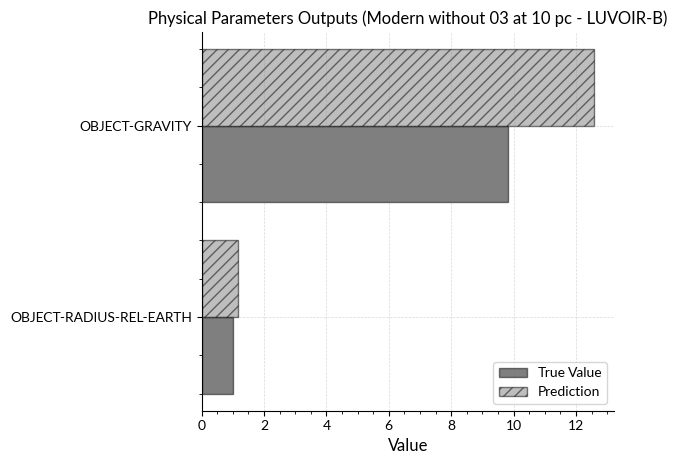

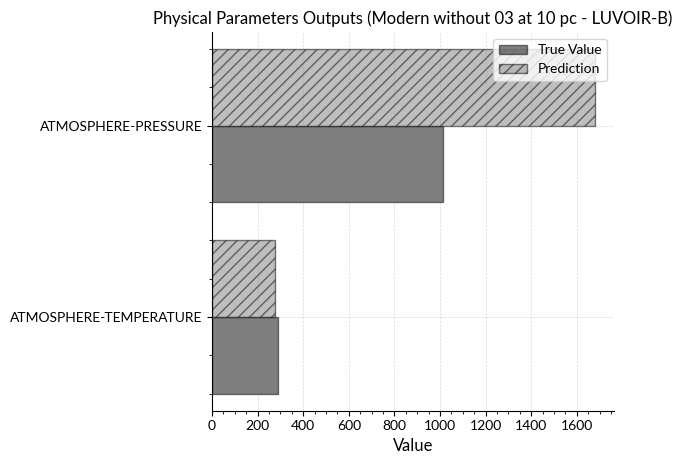

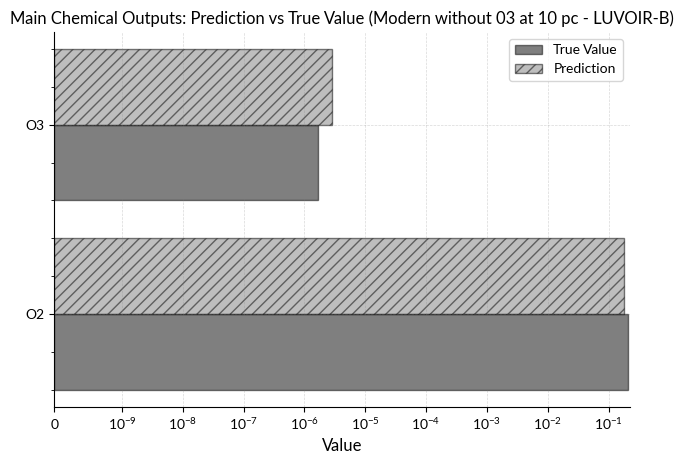

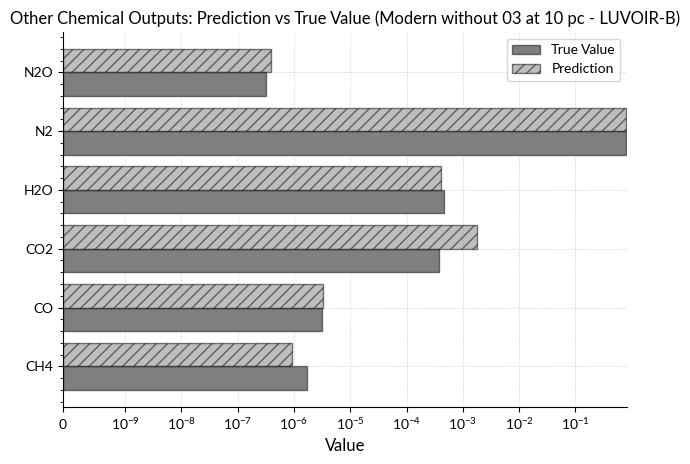



Processing file: proterozoic5pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.008443,0.998887,0.009556
1,OBJECT-GRAVITY,9.922544,9.807000,0.115544
2,ATMOSPHERE-TEMPERATURE,275.298218,289.000000,-13.701782
3,ATMOSPHERE-PRESSURE,1040.190796,959.000000,81.190796



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,4.445830e-03,2.629730e-03,1.816100e-03
1,O3,5.000000e-08,3.000000e-08,2.000000e-08



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,4.931510e-03,2.139460e-03,2.792050e-03
1,CO,3.086000e-05,1.741000e-05,1.344000e-05
2,CO2,3.066808e-02,1.252251e-02,1.814557e-02
3,H2O,8.788790e-03,4.682740e-03,4.106050e-03
4,N2,9.526401e-01,9.780081e-01,-2.536805e-02
5,N2O,1.000000e-08,1.000000e-08,1.000000e-08


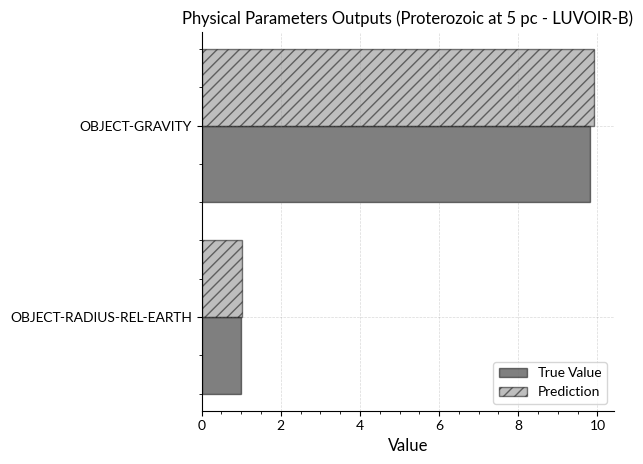

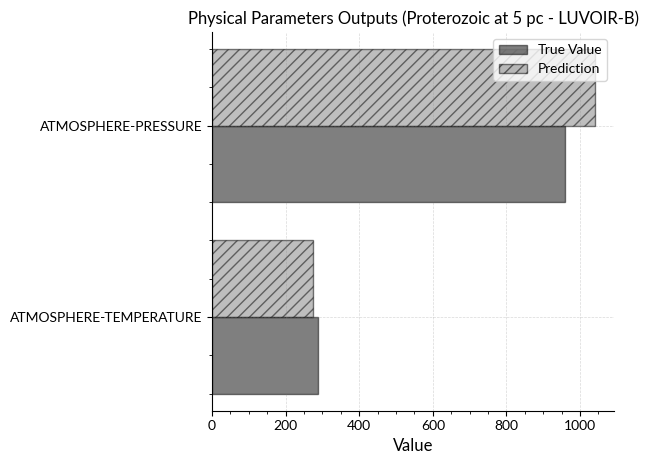

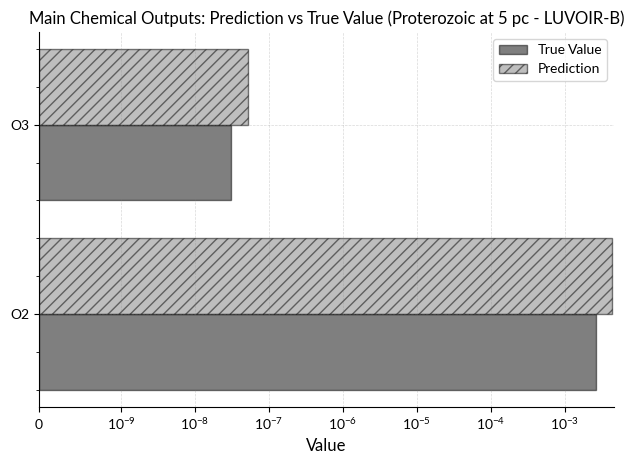

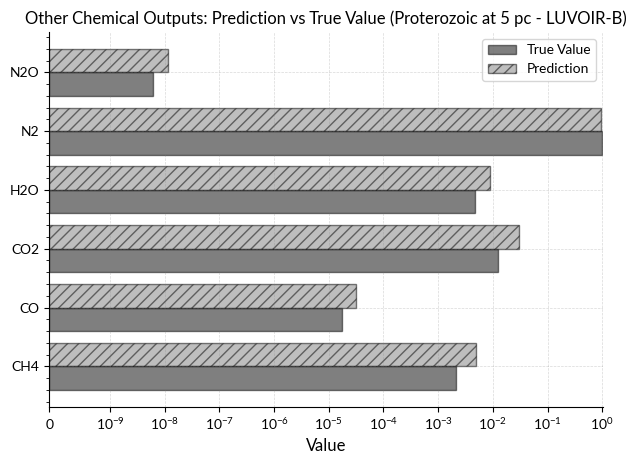



Processing file: modernwithoutO3_10pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.138275,0.998887,0.139388
1,OBJECT-GRAVITY,11.985320,9.807000,2.178319
2,ATMOSPHERE-TEMPERATURE,277.937836,288.200000,-10.262164
3,ATMOSPHERE-PRESSURE,1521.131226,1013.000000,508.131226



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,1.021512e-01,0.210931,-1.087800e-01
1,O3,1.000000e-08,0.000000,1.000000e-08



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,4.500000e-07,1.720000e-06,-1.260000e-06
1,CO,7.700000e-07,3.210000e-06,-2.440000e-06
2,CO2,4.078000e-05,3.830100e-04,-3.422300e-04
3,H2O,4.499000e-04,4.620700e-04,-1.216000e-05
4,N2,8.969948e-01,7.882168e-01,1.087780e-01
5,N2O,4.000000e-08,3.200000e-07,-2.800000e-07


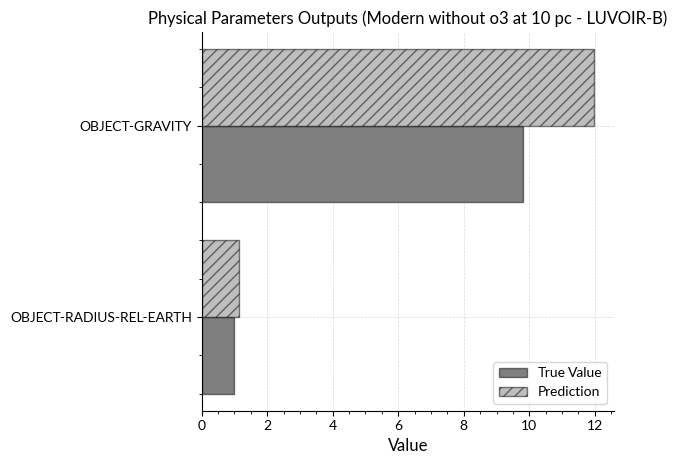

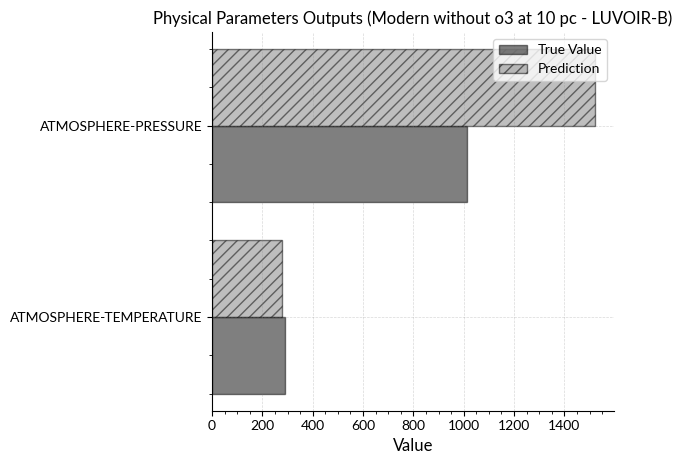

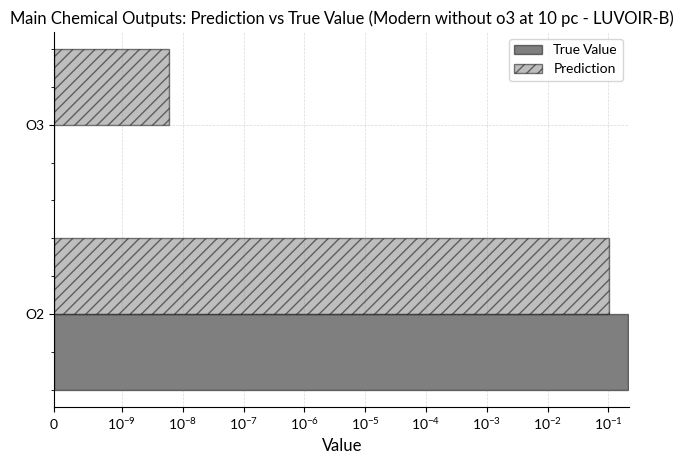

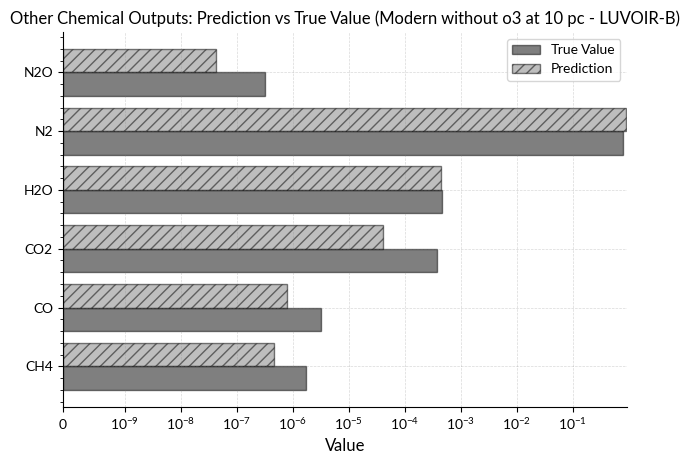



Processing file: archean5pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.217754,0.998887,0.218867
1,OBJECT-GRAVITY,13.568780,9.807000,3.761780
2,ATMOSPHERE-TEMPERATURE,274.316589,276.207386,-1.890797
3,ATMOSPHERE-PRESSURE,1948.980469,1000.000000,948.980591



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,0.001723,0.001927,-0.000204
1,CO,0.001303,0.001609,-0.000305
2,CO2,0.007926,0.012595,-0.004669
3,H2O,0.000108,0.000162,-0.000054
4,N2,0.982831,0.983706,-0.000875
5,N2O,0.000000,0.000000,0.000000


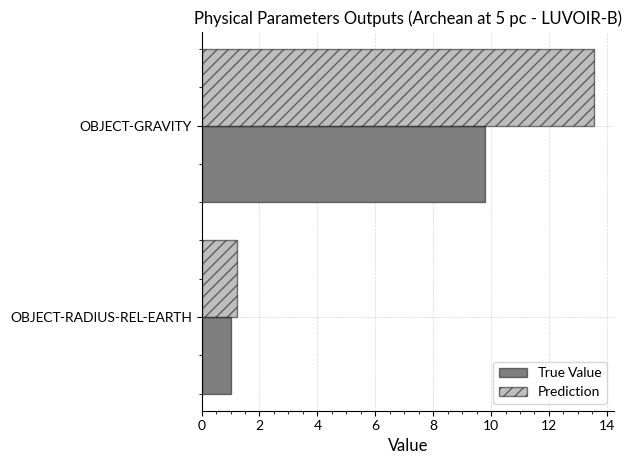

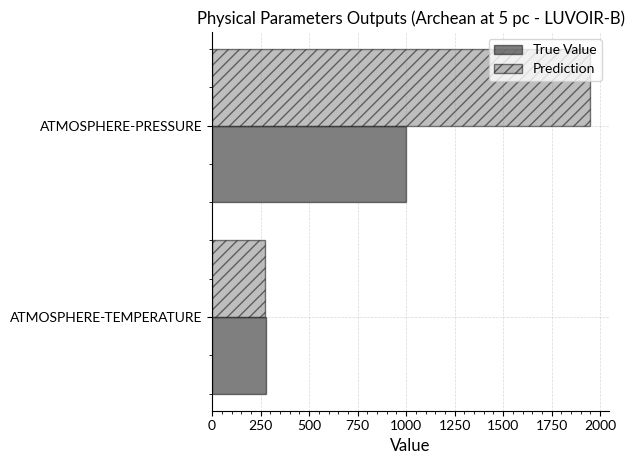

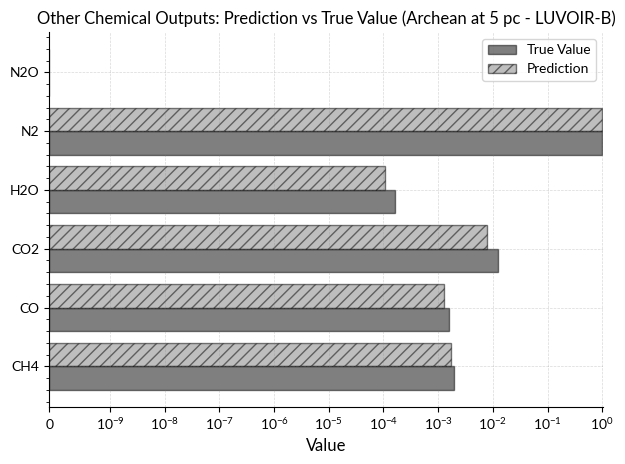



Processing file: archean10pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.207597,0.998887,0.208710
1,OBJECT-GRAVITY,13.344947,9.807000,3.537947
2,ATMOSPHERE-TEMPERATURE,275.961212,276.207386,-0.246174
3,ATMOSPHERE-PRESSURE,1885.878052,1000.000000,885.878052



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,0.002491,0.001927,0.000564
1,CO,0.000541,0.001609,-0.001067
2,CO2,0.016194,0.012595,0.003599
3,H2O,0.000125,0.000162,-0.000037
4,N2,0.972488,0.983706,-0.011218
5,N2O,0.000000,0.000000,0.000000


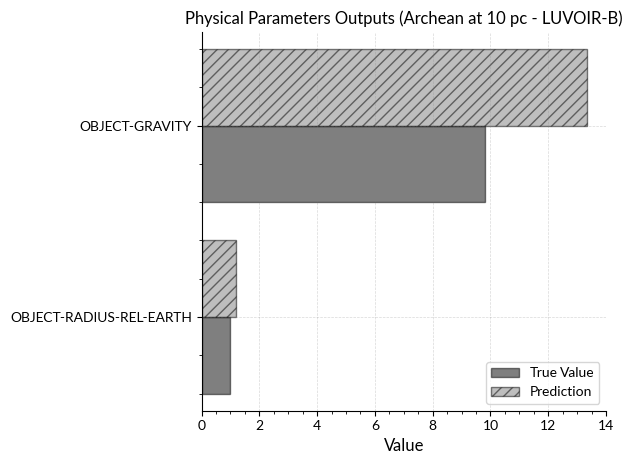

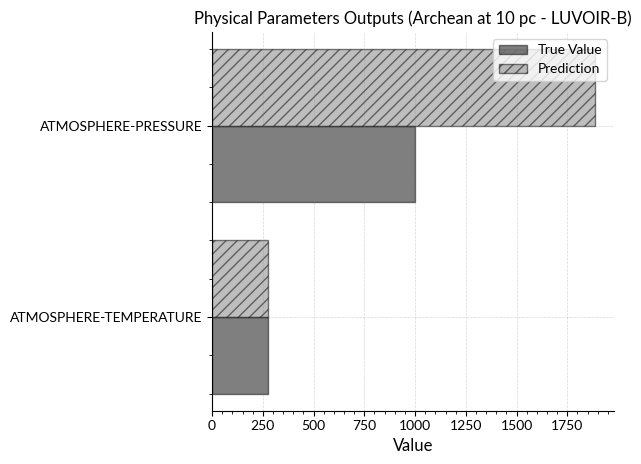

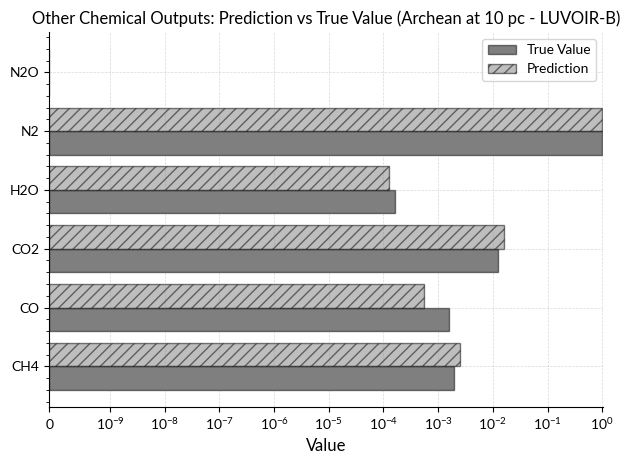



Processing file: archean15pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.193218,0.998887,0.194331
1,OBJECT-GRAVITY,12.975999,9.807000,3.168999
2,ATMOSPHERE-TEMPERATURE,281.990448,276.207386,5.783062
3,ATMOSPHERE-PRESSURE,1782.711792,1000.000000,782.711792



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,0.002240,0.001927,0.000313
1,CO,0.001056,0.001609,-0.000552
2,CO2,0.018704,0.012595,0.006109
3,H2O,0.000255,0.000162,0.000093
4,N2,0.951863,0.983706,-0.031843
5,N2O,0.000000,0.000000,0.000000


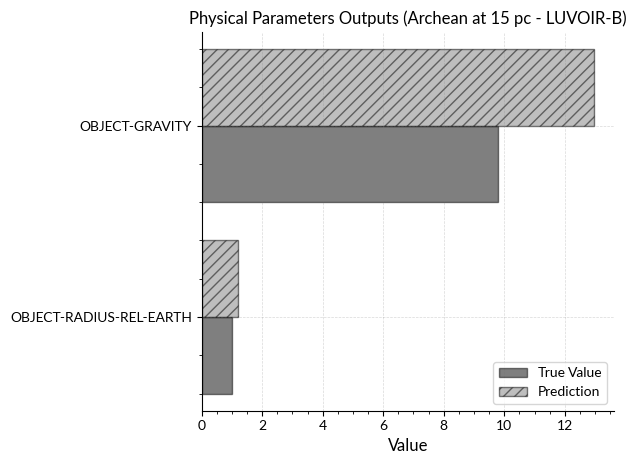

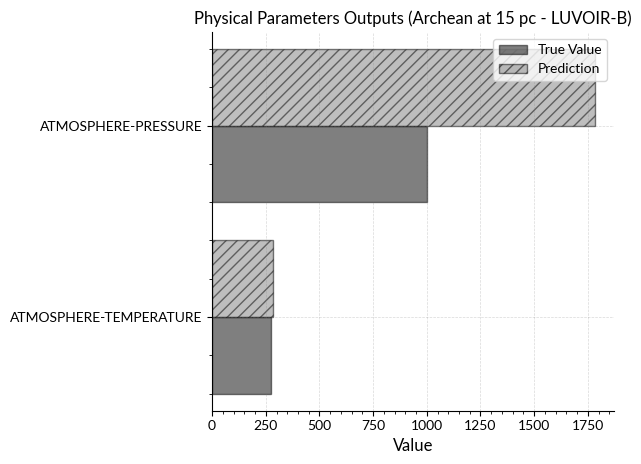

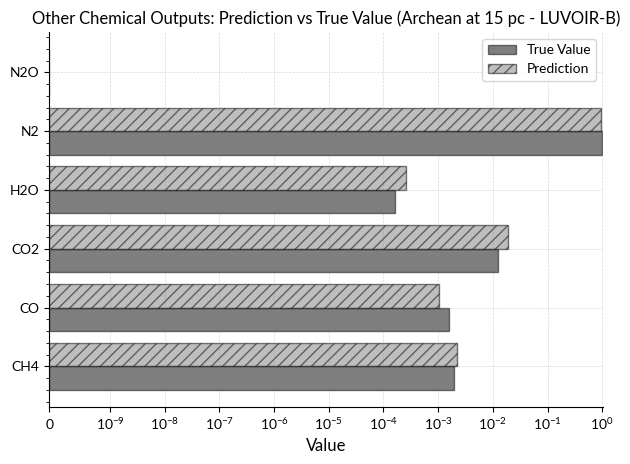



Processing file: modern15pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.119329,0.998887,0.120442
1,OBJECT-GRAVITY,11.670376,9.807000,1.863376
2,ATMOSPHERE-TEMPERATURE,285.447052,288.200000,-2.752948
3,ATMOSPHERE-PRESSURE,1436.938110,1013.000000,423.938110



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.215807,0.210931,0.004876
1,O3,0.000004,0.000002,0.000002



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,1.340000e-06,1.720000e-06,-3.700000e-07
1,CO,3.250000e-06,3.210000e-06,4.000000e-08
2,CO2,2.830400e-04,3.830100e-04,-9.996000e-05
3,H2O,5.642500e-04,4.620700e-04,1.021800e-04
4,N2,7.830868e-01,7.882168e-01,-5.129920e-03
5,N2O,3.400000e-07,3.200000e-07,2.000000e-08


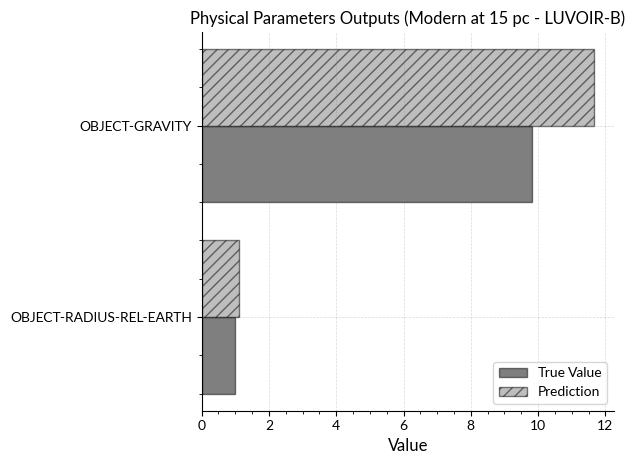

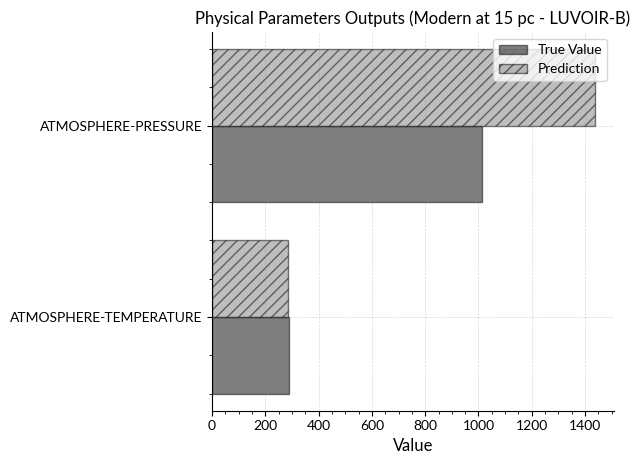

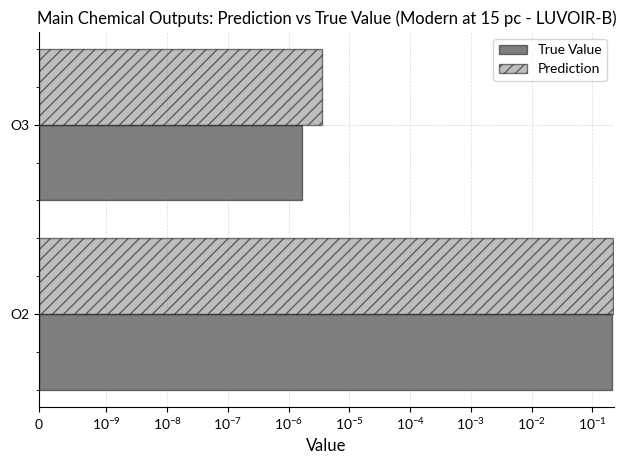

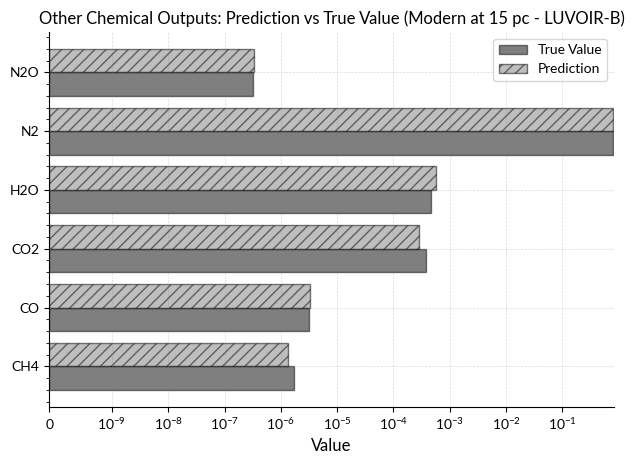



Processing file: modern10pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.204791,0.998887,0.205904
1,OBJECT-GRAVITY,13.254846,9.807000,3.447846
2,ATMOSPHERE-TEMPERATURE,276.239532,288.200000,-11.960468
3,ATMOSPHERE-PRESSURE,1861.804565,1013.000000,848.804565



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.114827,0.210931,-9.610432e-02
1,O3,0.000002,0.000002,6.600000e-07



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,2.570000e-06,1.720000e-06,8.500000e-07
1,CO,2.430000e-06,3.210000e-06,-7.800000e-07
2,CO2,3.681100e-04,3.830100e-04,-1.490000e-05
3,H2O,2.813300e-04,4.620700e-04,-1.807400e-04
4,N2,8.718821e-01,7.882168e-01,8.366538e-02
5,N2O,2.600000e-07,3.200000e-07,-6.000000e-08


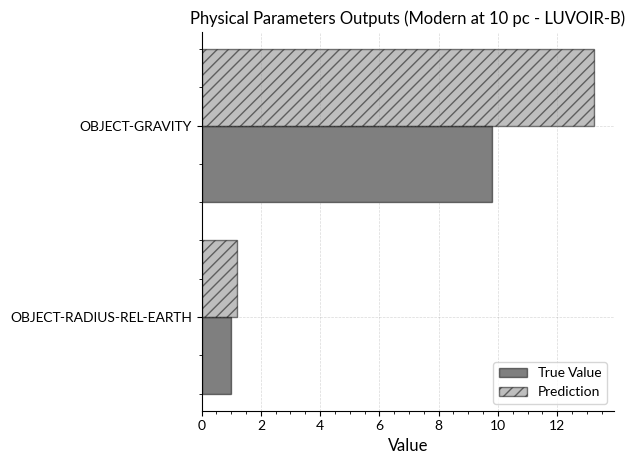

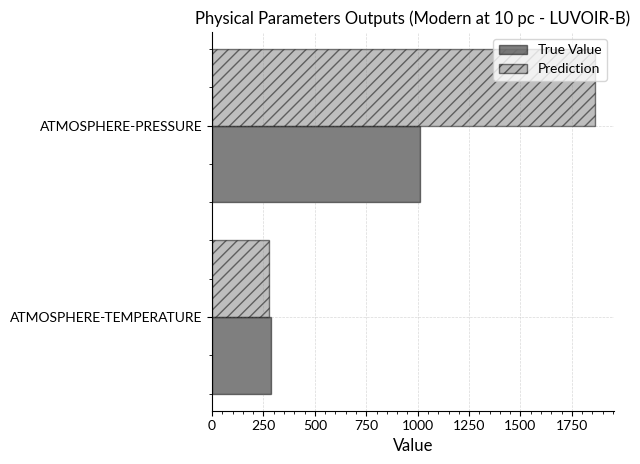

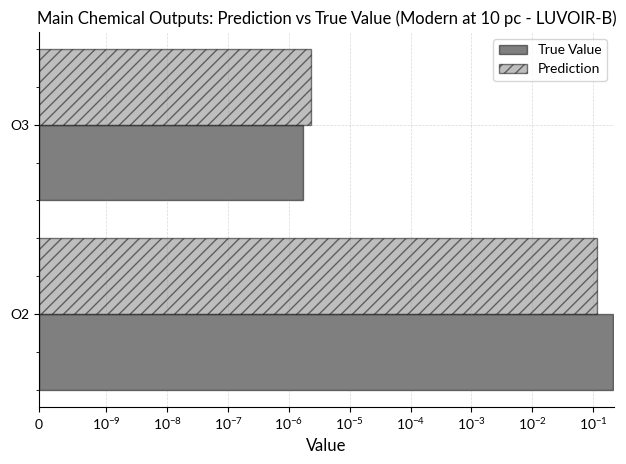

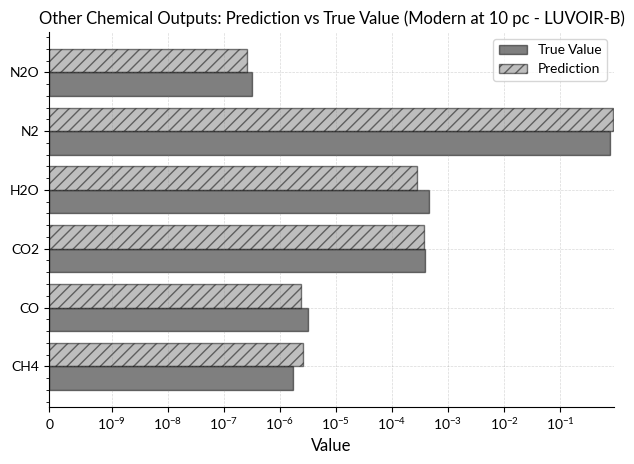



Processing file: modernwithout02_10pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.187532,0.998887,0.188645
1,OBJECT-GRAVITY,12.908605,9.807000,3.101604
2,ATMOSPHERE-TEMPERATURE,279.628876,288.200000,-8.571124
3,ATMOSPHERE-PRESSURE,1764.815674,1013.000000,751.815674



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.144692,0.210931,-6.623909e-02
1,O3,0.000002,0.000002,7.700000e-07



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,5.400000e-07,1.720000e-06,-1.170000e-06
1,CO,1.790000e-06,3.210000e-06,-1.420000e-06
2,CO2,2.503200e-04,3.830100e-04,-1.326800e-04
3,H2O,3.323800e-04,4.620700e-04,-1.296900e-04
4,N2,8.407698e-01,7.882168e-01,5.255307e-02
5,N2O,2.400000e-07,3.200000e-07,-8.000000e-08


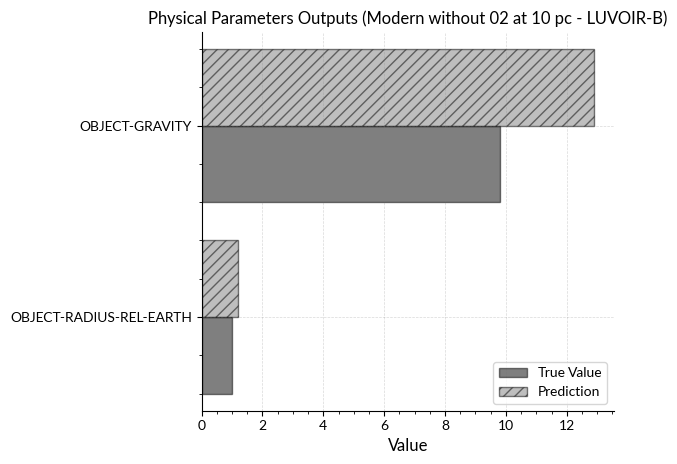

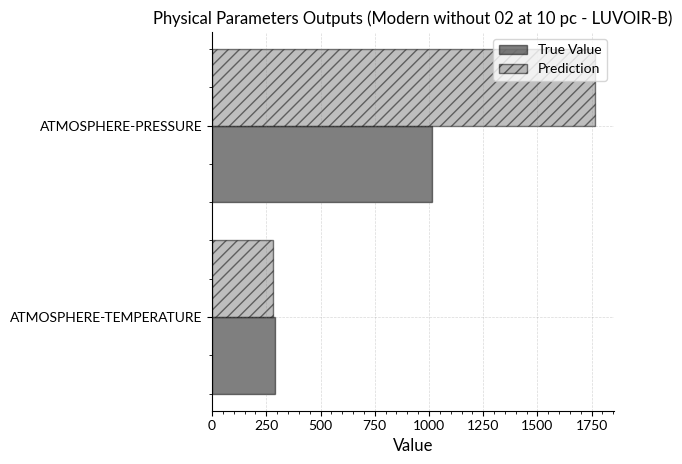

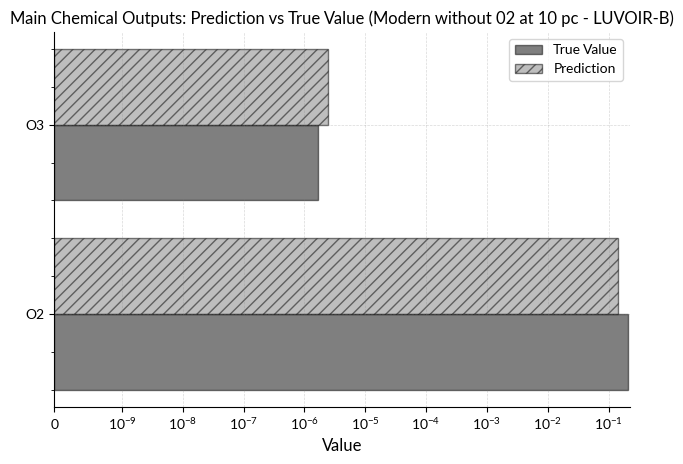

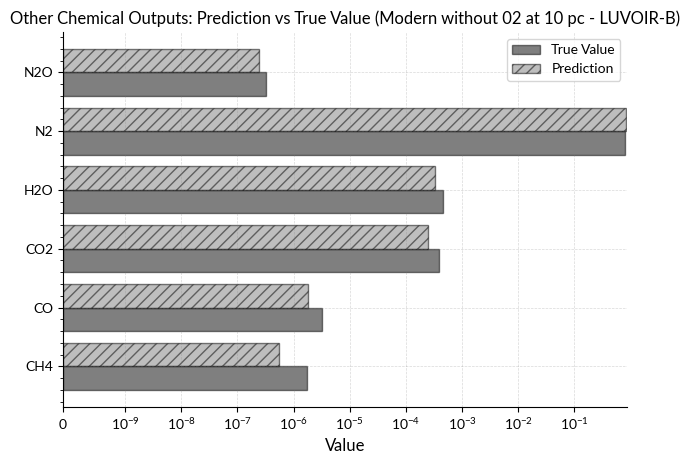



Processing file: proterozoic10pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.045762,0.998887,0.046875
1,OBJECT-GRAVITY,10.520937,9.807000,0.713937
2,ATMOSPHERE-TEMPERATURE,277.278046,289.000000,-11.721954
3,ATMOSPHERE-PRESSURE,1167.217407,959.000000,208.217407



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,1.506410e-03,2.629730e-03,-1.123320e-03
1,O3,6.000000e-08,3.000000e-08,2.000000e-08



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,4.057170e-03,2.139460e-03,0.001918
1,CO,2.135000e-05,1.741000e-05,0.000004
2,CO2,1.874340e-02,1.252251e-02,0.006221
3,H2O,8.562550e-03,4.682740e-03,0.003880
4,N2,9.699899e-01,9.780081e-01,-0.008018
5,N2O,1.000000e-08,1.000000e-08,0.000000


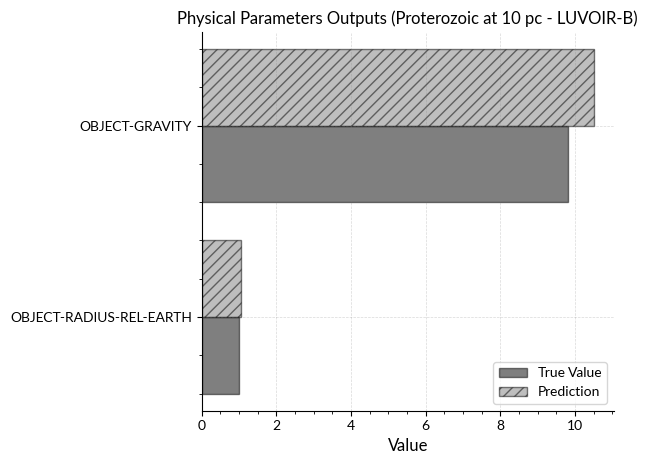

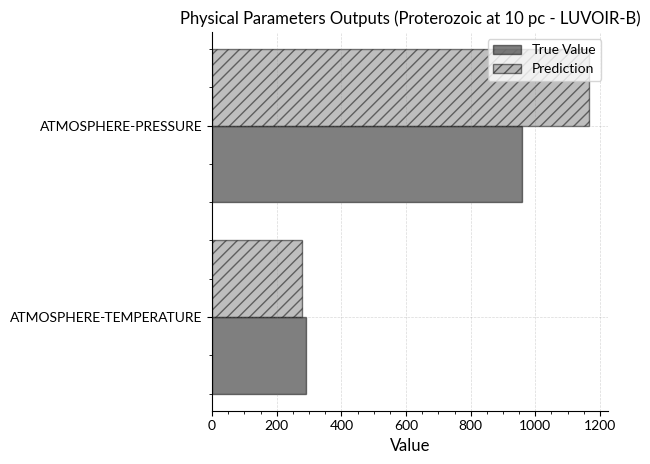

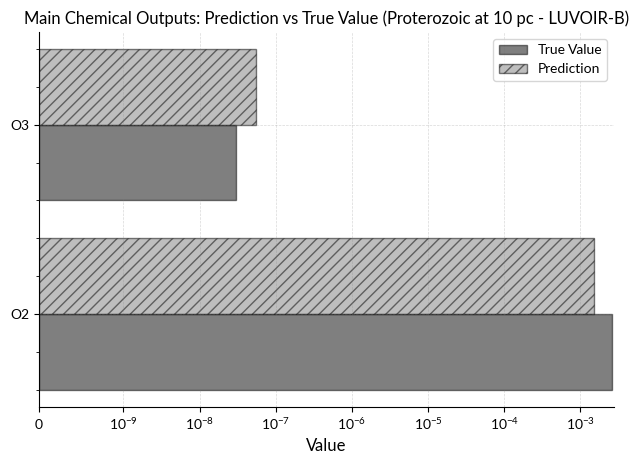

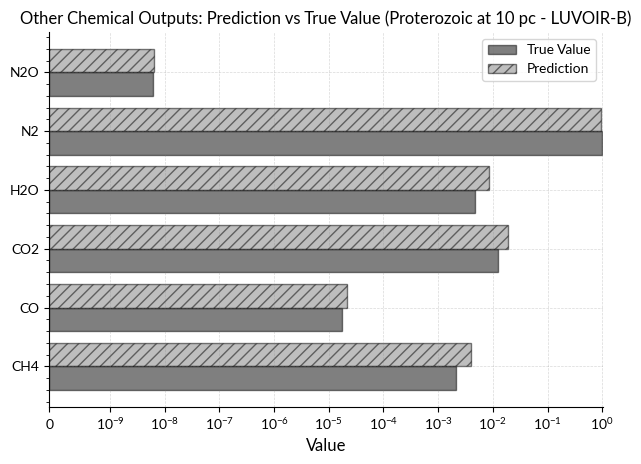



Processing file: modernwithoutO2_10pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.082087,0.998887,0.083200
1,OBJECT-GRAVITY,10.977642,9.807000,1.170642
2,ATMOSPHERE-TEMPERATURE,279.734406,288.200000,-8.465594
3,ATMOSPHERE-PRESSURE,1276.245850,1013.000000,263.245850



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.003947,0.000000,0.003947
1,O3,0.000004,0.000002,0.000002



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,2.500000e-07,1.720000e-06,-1.460000e-06
1,CO,1.010000e-06,3.210000e-06,-2.200000e-06
2,CO2,9.871000e-05,3.830100e-04,-2.843000e-04
3,H2O,5.853400e-04,4.620700e-04,1.232800e-04
4,N2,1.000000e+00,7.882168e-01,2.117832e-01
5,N2O,8.000000e-08,3.200000e-07,-2.400000e-07


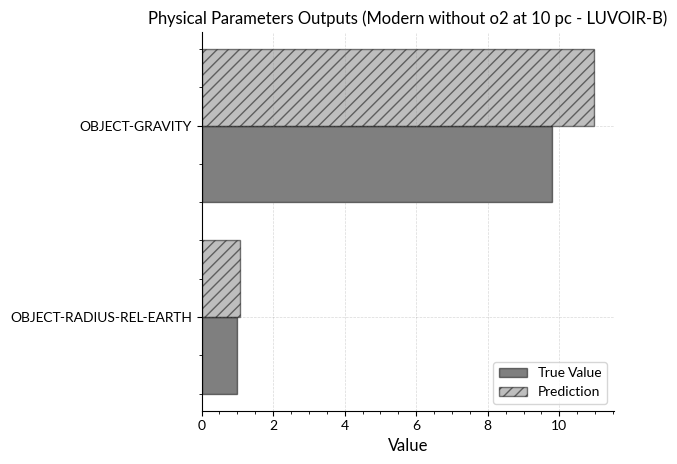

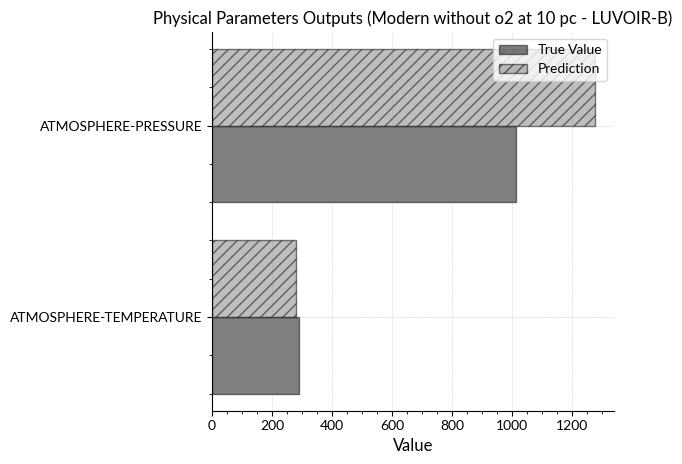

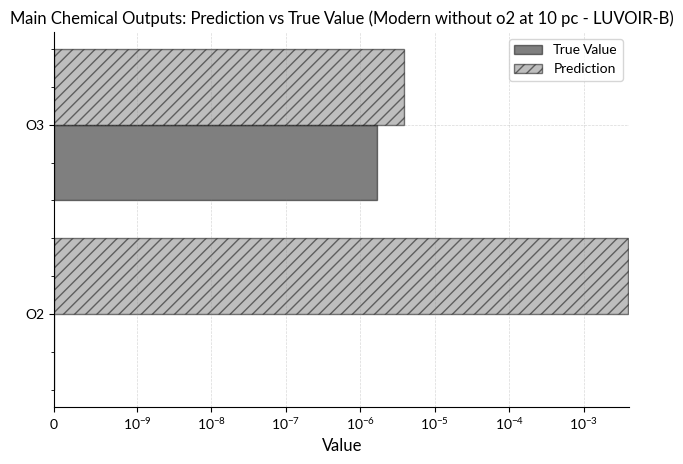

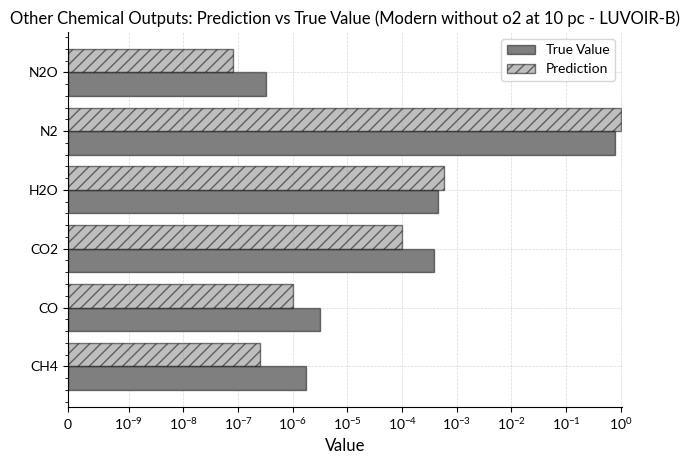



Processing file: proterozoic15pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.027557,0.998887,0.028670
1,OBJECT-GRAVITY,10.222794,9.807000,0.415794
2,ATMOSPHERE-TEMPERATURE,278.611176,289.000000,-10.388824
3,ATMOSPHERE-PRESSURE,1101.568970,959.000000,142.568970



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,2.829180e-03,2.629730e-03,1.994500e-04
1,O3,7.000000e-08,3.000000e-08,4.000000e-08



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,4.091880e-03,2.139460e-03,0.001952
1,CO,2.453000e-05,1.741000e-05,0.000007
2,CO2,1.873456e-02,1.252251e-02,0.006212
3,H2O,8.533180e-03,4.682740e-03,0.003850
4,N2,9.648066e-01,9.780081e-01,-0.013201
5,N2O,1.000000e-08,1.000000e-08,0.000000


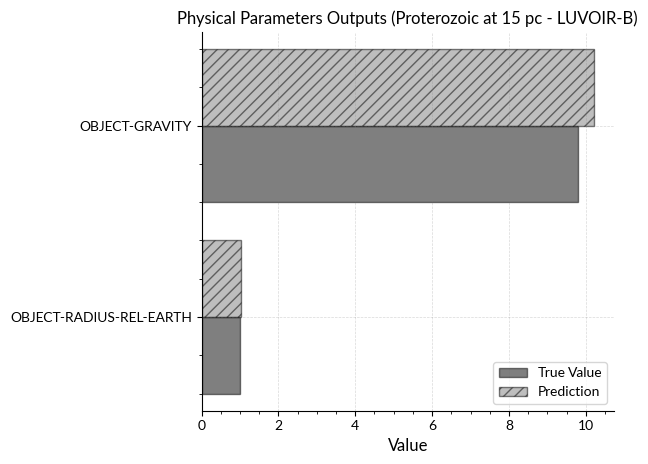

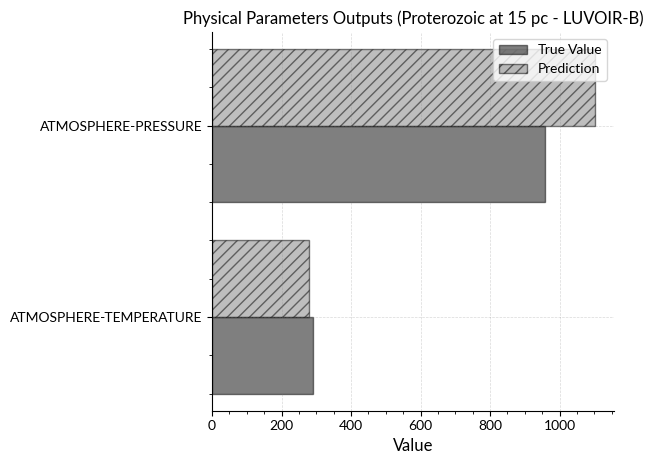

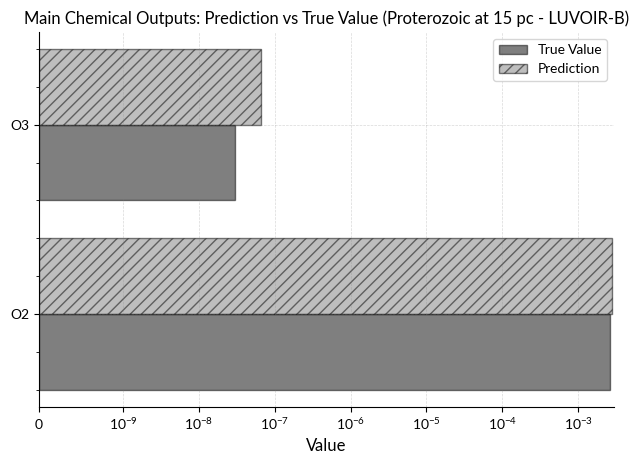

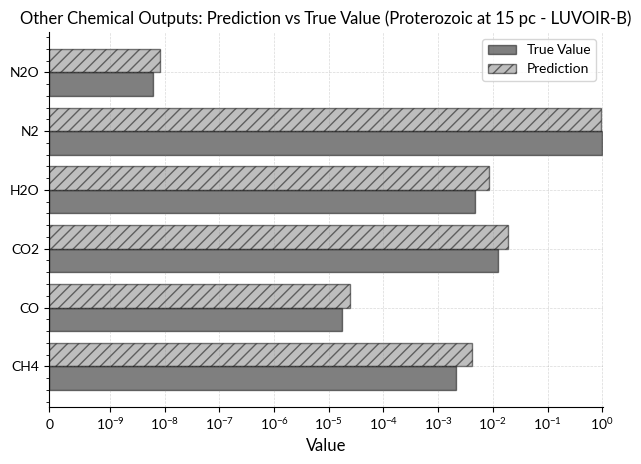



Processing file: modern5pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.175393,0.998887,0.176506
1,OBJECT-GRAVITY,12.667657,9.807000,2.860657
2,ATMOSPHERE-TEMPERATURE,276.028442,288.200000,-12.171558
3,ATMOSPHERE-PRESSURE,1699.936523,1013.000000,686.936523



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.156811,0.210931,-5.411977e-02
1,O3,0.000003,0.000002,9.000000e-07



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,1.380000e-06,1.720000e-06,-3.400000e-07
1,CO,2.380000e-06,3.210000e-06,-8.300000e-07
2,CO2,3.171400e-04,3.830100e-04,-6.587000e-05
3,H2O,3.609000e-04,4.620700e-04,-1.011600e-04
4,N2,8.278907e-01,7.882168e-01,3.967394e-02
5,N2O,2.800000e-07,3.200000e-07,-4.000000e-08


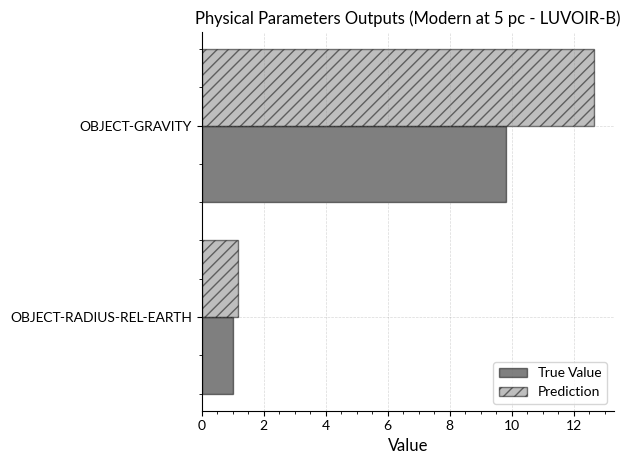

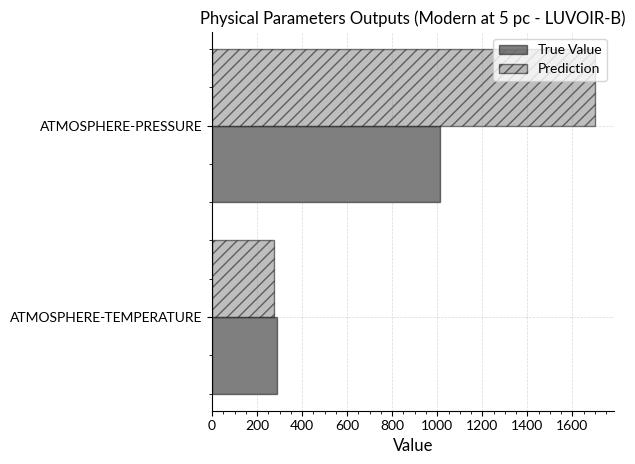

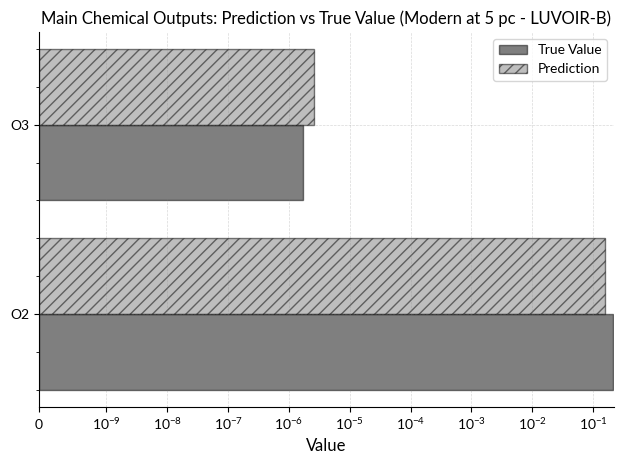

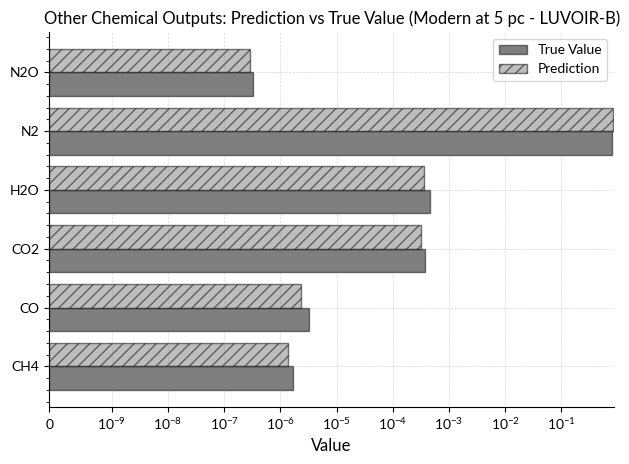

In [6]:
npy_files = glob.glob("../data/tests/*luvoir*.npy")

for file_path in npy_files:
    ############ DATA PROCESSING ############
    file_name = os.path.basename(file_path)
    formatted_title = format_title_luvoir(file_name)
    print(f"Processing file: {file_name}")
    
    data = np.load(file_path, allow_pickle=True)
    
    uv = data[0]["NOISY_ALBEDO"]
    vis = data[1]["NOISY_ALBEDO"]
    nir = data[2]["NOISY_ALBEDO"]
    
    uv_mean, uv_std = stats['inputs']['B-UV']['mean'], stats['inputs']['B-UV']['std']
    vis_mean, vis_std = stats['inputs']['B-Vis']['mean'], stats['inputs']['B-Vis']['std']
    nir_mean, nir_std = stats['inputs']['B-NIR']['mean'], stats['inputs']['B-NIR']['std']

    ############ DENORMALIZATION ############
    uv_normalized = (uv - uv_mean) / uv_std
    vis_normalized = (vis - vis_mean) / vis_std
    nir_normalized = (nir - nir_mean) / nir_std

    uv_normalized = uv_normalized.reshape(1, 8, 1)
    vis_normalized = vis_normalized.reshape(1, 94, 1)
    nir_normalized = nir_normalized.reshape(1, 49, 1)
    
    predictions = model_load.predict([uv_normalized, vis_normalized, nir_normalized])
    
    physical_pred = denormalize_physical(predictions['physical_output'], stats, physical_targets)
    main_chem_pred = denormalize_chemical(predictions['main_chemical_output'], stats, main_chemical_targets)
    other_chem_pred = denormalize_chemical(predictions['other_chemical_output'], stats, other_chemical_targets)
    
    ############ COMPARISON TABLES ############
    def get_gt(target):
        val = data[0].get(target, None)
        if val is None:
            return 0.0
        try:
            return float(val)
        except (ValueError, TypeError):
            return 0.0

    def build_comparison_df(targets, pred_values):
        data_list = []
        for i, target in enumerate(targets):
            pred_val = pred_values[0][i]
            gt_val = get_gt(target)
            diff = pred_val - gt_val
            data_list.append({
                "Target": target,
                "Prediction": pred_val,
                "True Value": gt_val,
                "Difference": diff
            })
        return pd.DataFrame(data_list)

    physical_df = build_comparison_df(physical_targets, physical_pred)
    main_chem_df = build_comparison_df(main_chemical_targets, main_chem_pred)
    other_chem_df = build_comparison_df(other_chemical_targets, other_chem_pred)
    
    print("\nPhysical Outputs Comparison:")
    display(physical_df.round(8))
    
    if 'archean' not in file_name.lower():
        print("\nMain Chemical Outputs Comparison:")
        display(main_chem_df.round(8))
    
    print("\nOther Chemical Outputs Comparison:")
    display(other_chem_df.round(8))

    ############ PLOTTING ############
    low_physical_targets = ["OBJECT-RADIUS-REL-EARTH", "OBJECT-GRAVITY"]
    high_physical_targets = ["ATMOSPHERE-TEMPERATURE", "ATMOSPHERE-PRESSURE"]
    
    low_physical_df = physical_df[physical_df["Target"].isin(low_physical_targets)]
    high_physical_df = physical_df[physical_df["Target"].isin(high_physical_targets)]
    
    if not low_physical_df.empty:
        y_low = range(len(low_physical_df))
        plt.barh(y_low, low_physical_df["True Value"], height=0.4, label="True Value",
                    color='black', alpha=0.5, edgecolor='black')
        plt.barh([i + 0.4 for i in y_low], low_physical_df["Prediction"], height=0.4, label="Prediction",
                    color='tab:gray', alpha=0.5, edgecolor='black', hatch='///')
        plt.yticks([i + 0.2 for i in y_low], low_physical_df["Target"])
        plt.xlabel("Value")
        plt.title(f"Physical Parameters Outputs ({formatted_title})")
        plt.legend()
        plt.tight_layout()
        plt.show()

    if not high_physical_df.empty:
        y_high = range(len(high_physical_df))
        plt.barh(y_high, high_physical_df["True Value"], height=0.4, label="True Value",
                    color='black', alpha=0.5, edgecolor='black')
        plt.barh([i + 0.4 for i in y_high], high_physical_df["Prediction"], height=0.4, label="Prediction",
                    color='tab:gray', alpha=0.5, edgecolor='black', hatch='///')
        plt.yticks([i + 0.2 for i in y_high], high_physical_df["Target"])
        plt.xlabel("Value")
        plt.title(f"Physical Parameters Outputs ({formatted_title})")
        plt.legend(loc="upper right")
        plt.tight_layout()
        plt.show()

    if 'archean' not in file_name.lower():
        y_main = range(len(main_chem_df))
        plt.barh(y_main, main_chem_df["True Value"], height=0.4, label="True Value",
                    color='black', alpha=0.5, edgecolor='black')
        plt.barh([i + 0.4 for i in y_main], main_chem_df["Prediction"], height=0.4, label="Prediction",
                    color='tab:gray', alpha=0.5, edgecolor='black', hatch='///')
        plt.yticks([i + 0.2 for i in y_main], main_chem_df["Target"])
        plt.xlabel("Value")
        plt.title(f"Main Chemical Outputs: Prediction vs True Value ({formatted_title})")
        plt.legend(loc="upper right")
        plt.xscale('symlog', linthresh=1e-9)
        plt.tight_layout()
        plt.show()

    y_other = range(len(other_chem_df))
    plt.barh(y_other, other_chem_df["True Value"], height=0.4, label="True Value",
                color='black', alpha=0.5, edgecolor='black')
    plt.barh([i + 0.4 for i in y_other], other_chem_df["Prediction"], height=0.4, label="Prediction",
                color='tab:gray', alpha=0.5, edgecolor='black', hatch='///')
    plt.yticks([i + 0.2 for i in y_other], other_chem_df["Target"])
    plt.xlabel("Value")
    plt.title(f"Other Chemical Outputs: Prediction vs True Value ({formatted_title})")
    plt.legend(loc="upper right")
    plt.xscale('symlog', linthresh=1e-9)
    plt.tight_layout()
    plt.show()

    print("\n" + "="*100 + "\n")

# Recover the spectrum

In [7]:
def get_config_data(stage="modern"):
    dg = datagen.DataGen(stage=stage)
    config_str = dg.config_str
    config_dict = dg._parse_config(config_str)
    datamod.mixing_ratio_constant(config_dict, 60)
    datamod.normalize_layer(config_dict, 60, st_.molweightlist(era=stage))
    return dg, config_dict

In [8]:
def generate_original_spectrum(config, instrument, dg):
    config_serialized = dg._serialize_config(config)
    wavelength, total, noise, _ = dg._generate_spectrum_for_instrument(config_serialized, instrument)
    noisy_albedo = np.random.normal(loc=total, scale=noise)
    df = pd.DataFrame({
        "WAVELENGTH": wavelength,
        "ALBEDO": total,
        "NOISE": noise,
        "NOISY_ALBEDO": noisy_albedo
    })
    return df

In [9]:
def generate_modified_spectrum(config, instrument, dg, radius, gravity, temperature, pressure, gas_values):
    modified_config = config.copy()

    modified_config['OBJECT-DIAMETER'] = radius * (2 * R_earth.to("km").value)
    modified_config['OBJECT-GRAVITY'] = gravity
    modified_config['ATMOSPHERE-TEMPERATURE'] = temperature
    modified_config['ATMOSPHERE-PRESSURE'] = pressure

    elements = modified_config.get("ATMOSPHERE-LAYERS-MOLECULES", "").split(",")
    
    # Update each gas in the provided gas_values dictionary
    for gas, new_value in gas_values.items():
        if gas in elements:
            gas_index = elements.index(gas)
            for key, value in modified_config.items():
                if key.startswith("ATMOSPHERE-LAYER-"):
                    values = value.split(',')
                    values[gas_index + 2] = str(new_value)
                    modified_config[key] = ','.join(values)

    config_serialized = dg._serialize_config(modified_config)
    wavelength, total, noise, _ = dg._generate_spectrum_for_instrument(config_serialized, instrument)
    noisy_albedo = np.random.normal(loc=total, scale=noise)
    df = pd.DataFrame({
        "WAVELENGTH": wavelength,
        "ALBEDO": total,
        "NOISE": noise,
        "NOISY_ALBEDO": noisy_albedo
    })
    return df

Processing: Archean at 10 pc - LUVOIR-B with stage: archean
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


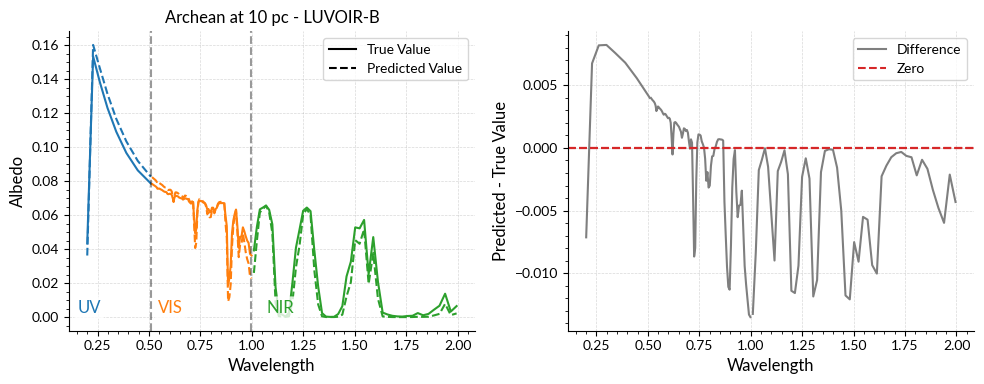

Processing: Modern at 10 pc - LUVOIR-B with stage: modern
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


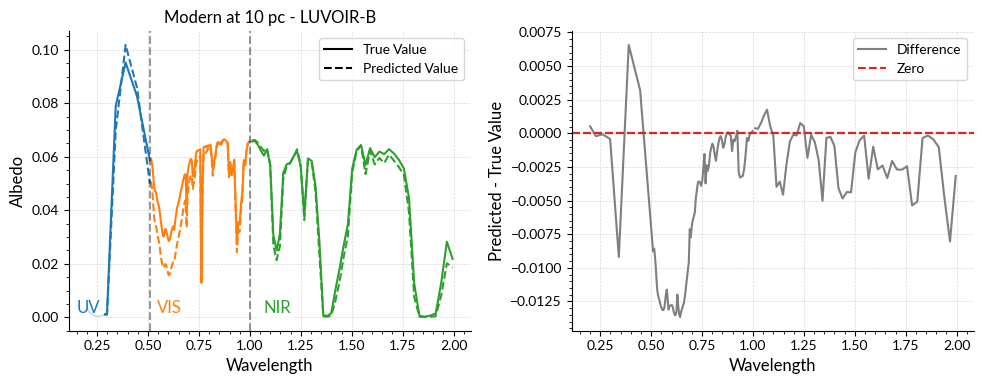

Processing: Proterozoic at 10 pc - LUVOIR-B with stage: proterozoic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


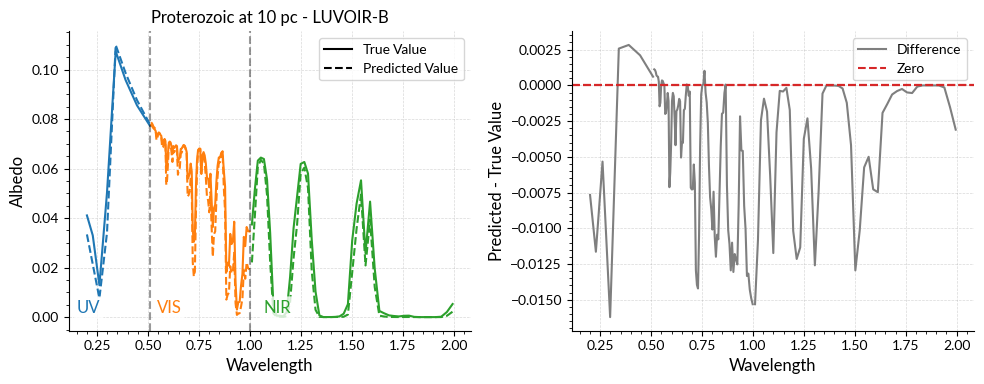

In [40]:
npy_files = glob.glob("../data/tests/*10pc*luvoir*.npy")
npy_files = [f for f in npy_files if "without" not in os.path.basename(f).lower()]

for file_path in npy_files:
    file_name = os.path.basename(file_path)
    formatted_title = format_title_luvoir(file_name)
    stage = get_stage_from_filename(file_name)
    print("Processing:", formatted_title, "with stage:", stage)
    
    # Load npy file (assumes similar structure as before)
    data = np.load(file_path, allow_pickle=True)
    uv = data[0]["NOISY_ALBEDO"]
    vis = data[1]["NOISY_ALBEDO"]
    nir = data[2]["NOISY_ALBEDO"]
    
    # Normalize each band using loaded stats
    uv_norm = (uv - stats['inputs']['B-UV']['mean']) / stats['inputs']['B-UV']['std']
    vis_norm = (vis - stats['inputs']['B-Vis']['mean']) / stats['inputs']['B-Vis']['std']
    nir_norm = (nir - stats['inputs']['B-NIR']['mean']) / stats['inputs']['B-NIR']['std']
    
    # Reshape to match model input dimensions
    uv_norm = uv_norm.reshape(1, 8, 1)
    vis_norm = vis_norm.reshape(1, 94, 1)
    nir_norm = nir_norm.reshape(1, 49, 1)
    
    # Get predictions from the model using the npy data
    predictions = model_load.predict([uv_norm, vis_norm, nir_norm])
    physical_pred = denormalize_physical(predictions['physical_output'], stats, physical_targets)
    main_chem_pred = denormalize_chemical(predictions['main_chemical_output'], stats, main_chemical_targets)
    other_chem_pred = denormalize_chemical(predictions['other_chemical_output'], stats, other_chemical_targets)
    
    # Extract predicted physical parameters
    predicted_radius      = physical_pred[0, 0] 
    predicted_gravity     = physical_pred[0, 1]
    predicted_temperature = physical_pred[0, 2]
    predicted_pressure    = physical_pred[0, 3]
    
    # Merge chemical predictions into a dictionary.
    predicted_gas_values = {
        "O2": main_chem_pred[0, 0],
        "O3": main_chem_pred[0, 1],
        "CH4": other_chem_pred[0, 0],
        "CO": other_chem_pred[0, 1],
        "CO2": other_chem_pred[0, 2],
        "H2O": other_chem_pred[0, 3],
        "N2": other_chem_pred[0, 4],
        "N2O": other_chem_pred[0, 5]
    }
    
    dg, config = get_config_data(stage)
    uv_real  = generate_original_spectrum(config, "B-UV", dg)
    vis_real = generate_original_spectrum(config, "B-Vis", dg)
    nir_real = generate_original_spectrum(config, "B-NIR", dg)
    
    uv_pred  = generate_modified_spectrum(config, "B-UV", dg,
                                            predicted_radius,
                                            predicted_gravity,
                                            predicted_temperature,
                                            predicted_pressure,
                                            predicted_gas_values)
    vis_pred = generate_modified_spectrum(config, "B-Vis", dg,
                                            predicted_radius,
                                            predicted_gravity,
                                            predicted_temperature,
                                            predicted_pressure,
                                            predicted_gas_values)
    nir_pred = generate_modified_spectrum(config, "B-NIR", dg,
                                            predicted_radius,
                                            predicted_gravity,
                                            predicted_temperature,
                                            predicted_pressure,
                                            predicted_gas_values)
    
    b_uv_end = uv_real["WAVELENGTH"].iloc[-1]
    b_vis_end = vis_real["WAVELENGTH"].iloc[-1]

    _, axes = plt.subplots(1, 2, figsize=(10, 4))
    # Plot all channels on left axis
    axes[0].plot(uv_real["WAVELENGTH"], uv_real["ALBEDO"], color="tab:blue")
    axes[0].plot(uv_pred["WAVELENGTH"], uv_pred["ALBEDO"], linestyle="--", color="tab:blue")

    axes[0].plot(vis_real["WAVELENGTH"], vis_real["ALBEDO"], color="tab:orange")
    axes[0].plot(vis_pred["WAVELENGTH"], vis_pred["ALBEDO"], linestyle="--", color="tab:orange")

    axes[0].plot(nir_real["WAVELENGTH"], nir_real["ALBEDO"], color="tab:green")
    axes[0].plot(nir_pred["WAVELENGTH"], nir_pred["ALBEDO"], linestyle="--", color="tab:green")

    axes[0].axvline(b_uv_end, color='k', linestyle='--', alpha=0.4)
    axes[0].axvline(b_vis_end, color='k', linestyle='--', alpha=0.4)

    axes[0].text(0.05, 0.05, "UV", color='tab:blue', ha='center', va='bottom',
                 transform=axes[0].transAxes,
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))

    axes[0].text(0.25, 0.05, "VIS", color='tab:orange', ha='center', va='bottom',
                 transform=axes[0].transAxes,
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))

    axes[0].text(0.52, 0.05, "NIR", color='tab:green', ha='center', va='bottom',
                 transform=axes[0].transAxes,
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))

    axes[0].set_xlabel("Wavelength")
    axes[0].set_ylabel("Albedo")
    axes[0].set_title(f"{formatted_title}")
    
    # Create custom legend with 2 items: solid for True Value, dashed for Predicted Value.
    true_line = Line2D([], [], color='k', linestyle='-', label='True Value')
    pred_line = Line2D([], [], color='k', linestyle='--', label='Predicted Value')
    axes[0].legend(handles=[true_line, pred_line])

    # Plot difference on right axis for each channel
    channels = [("UV", uv_real, uv_pred),
                ("VIS", vis_real, vis_pred),
                ("NIR", nir_real, nir_pred)]
    for label, df_real, df_pred in channels:
        diff = df_pred["ALBEDO"] - df_real["ALBEDO"]
        axes[1].plot(df_real["WAVELENGTH"], diff, color="tab:gray")
        axes[1].axhline(0, color='tab:red', linestyle='--')
    
    line = Line2D([], [], color='tab:gray', linestyle='-', label='Difference')
    dashed = Line2D([], [], color='tab:red', linestyle='--', label='Zero')

    axes[1].legend(handles=[line, dashed])
    axes[1].set_xlabel("Wavelength")
    axes[1].set_ylabel("Predicted - True Value")
    
    plt.tight_layout()
    plt.show()